### Keras Tuner- Decide Number of Hidden Layers And Neuron In Neural Network

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
import pandas as pd
from tensorflow import keras
from keras import layers, losses
from keras_tuner.tuners import RandomSearch
import numpy as np

In [24]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Keras-Tuner/main/Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 77.0 KB


In [52]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [108]:
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1092.000000
mean,26.009241,32.482251,19.460201,1008.081885,62.918573,2.003111,6.751510,15.805124,109.090984
std,7.237401,6.679078,7.438653,7.529237,15.709816,0.747541,3.841137,7.308435,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.200000,21.200000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


In [76]:
df.isnull().any()

T         False
TM        False
Tm        False
SLP       False
H         False
VV        False
V         False
VM        False
PM 2.5     True
dtype: bool

In [77]:
print(len(df[df.values==0.0]),"\n",
df[df.values==0.0])

37 
          T    TM    Tm     SLP     H   VV     V    VM      PM 2.5
45    24.7  31.5  17.0  1008.6  57.0  2.1   7.6  14.8    0.000000
57    28.0  38.6  23.8  1007.3  48.0  2.3  15.6  25.9    0.000000
60    31.4  37.8  22.0  1006.9  38.0  2.3  13.7  22.2    0.000000
93    32.8  37.6  28.4   995.8  67.0  1.9   9.3  18.3    0.000000
127   30.9  35.6  25.0  1004.8  58.0  2.3   6.9  14.8    0.000000
128   29.6  34.2  25.8  1007.3  67.0  1.9   6.3  14.8    0.000000
129   29.3  35.0  24.1  1007.6  70.0  1.9   4.3  11.1    0.000000
193   14.5  21.0   8.6  1023.2  88.0  1.3   3.5   7.6    0.000000
194   14.6  22.3   9.0  1021.2  86.0  1.0   4.4   9.4    0.000000
325   30.3  36.9  24.6  1009.1  58.0  2.6   2.8   9.4    0.000000
326   30.7  37.0  24.4  1008.1  57.0  2.7   2.0  14.8    0.000000
330   27.6  34.5  18.6  1009.8  66.0  1.8   8.7  14.8    0.000000
473   31.3  36.5  27.3   999.3  73.0  2.7   8.7  14.8    0.000000
474   30.0  36.6  27.0   998.8  76.0  2.6  16.9  25.9    0.000000
517  

<AxesSubplot:>

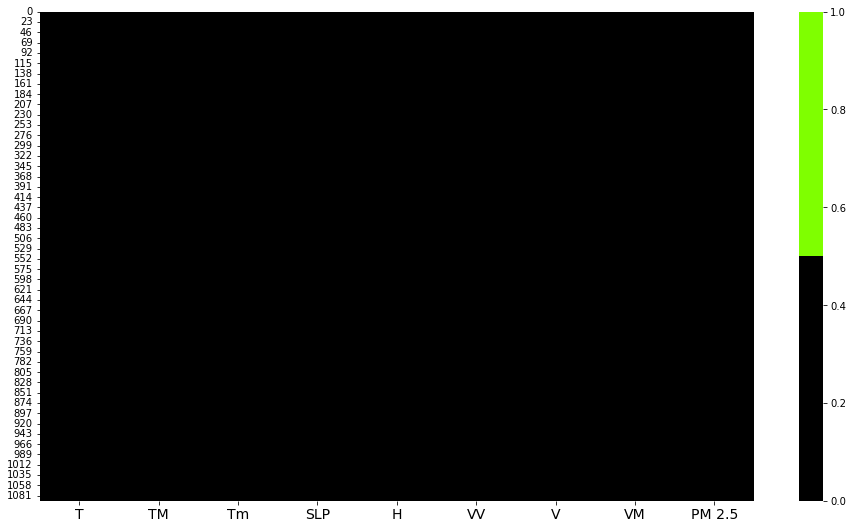

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (16,9))
plt.xticks(fontsize = 14)
cols= df.columns
colors = ['#000000','#7FFF00']
sns.heatmap(df[cols].isnull(), cmap = sns.color_palette(colors))

<AxesSubplot:>

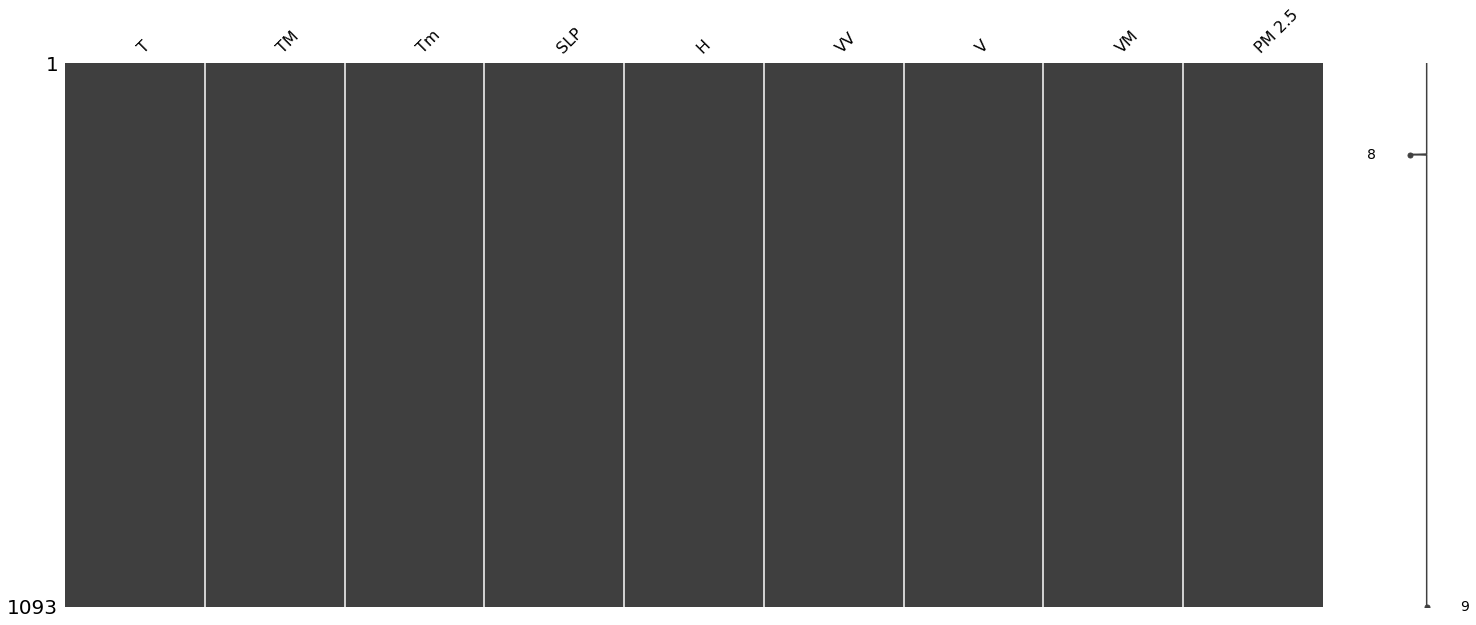

In [61]:
import missingno as mn
mn.matrix(df)

<AxesSubplot:>

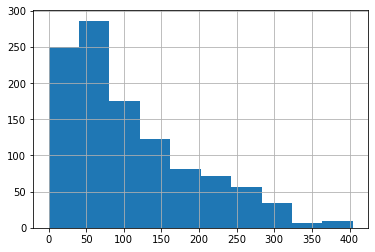

In [53]:
df['PM 2.5'].hist()

<AxesSubplot:>

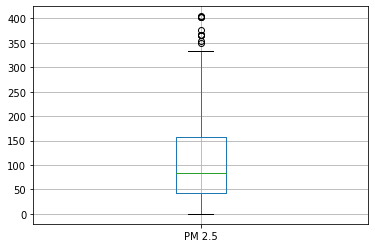

In [57]:
df[['PM 2.5']].boxplot()

In [87]:
updated_df = df.copy()
updated_df['PM 2.5']=updated_df['PM 2.5'].fillna(updated_df['PM 2.5'].median())

In [88]:
updated_df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [89]:
updated_df[updated_df.duplicated()].shape

(362, 9)

In [90]:
updated_df[updated_df.duplicated()]

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
731,16.9,25.1,6.6,1021.3,65.0,1.1,2.0,7.6,284.795833
732,15.5,24.1,7.7,1021.0,71.0,1.1,3.5,11.1,219.720833
733,14.9,22.8,8.0,1018.4,73.0,1.1,5.9,13.0,182.187500
734,18.3,24.7,11.5,1018.1,85.0,0.5,1.1,7.6,154.037500
735,16.5,24.7,12.0,1017.4,82.0,0.6,8.0,13.0,223.208333
...,...,...,...,...,...,...,...,...,...
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


In [91]:
X=updated_df.iloc[:,:-1] ## independent features
y=updated_df.iloc[:,-1] ## dependent features

In [92]:
X

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2
...,...,...,...,...,...,...,...,...
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2
1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5


In [93]:
y

0       219.720833
1       182.187500
2       154.037500
3       223.208333
4       200.645833
           ...    
1088    288.416667
1089    256.833333
1090    169.000000
1091    186.041667
1092    185.583333
Name: PM 2.5, Length: 1093, dtype: float64

### Hyperparameters
1. How many number of hidden layers we should have?
2. How many number of neurons we should have in hidden layers?
3. Learning Rate

In [100]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss=losses.MeanAbsoluteError(reduction="auto", name="mean_absolute_error"),
        metrics=['mean_absolute_error'])
    return model

In [101]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project2',
    project_name='TunerTest2')

In [102]:
model_summary = tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [104]:
tuner.search(X_train, y_train,
             epochs=100,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 02m 12s]
val_mean_absolute_error: 42.73469670613607

Best val_mean_absolute_error So Far: 40.349561055501304
Total elapsed time: 00h 07m 25s
INFO:tensorflow:Oracle triggered exit


In [105]:
tuner.results_summary()

Results summary
Results in project2\TunerTest2
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 256
units_1: 96
learning_rate: 0.01
units_2: 128
units_3: 352
units_4: 64
units_5: 160
units_6: 160
units_7: 384
units_8: 96
units_9: 448
units_10: 288
units_11: 128
units_12: 224
units_13: 192
Score: 40.349561055501304
Trial summary
Hyperparameters:
num_layers: 11
units_0: 288
units_1: 448
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
Score: 41.01793670654297
Trial summary
Hyperparameters:
num_layers: 12
units_0: 288
units_1: 192
learning_rate: 0.0001
units_2: 64
units_3: 352
units_4: 352
units_5: 480
units_6: 320
units_7: 192
units_8: 384
units_9: 96
units_10: 448
units_11: 192
units_12: 384
units_13: 256
Score: 42.53661092122396
Trial summary
Hyperparameters:
num_layers: 17
units_0: 448
units_1: 128
learning_rate: 0.0001
units_2: 320
units_3: 480
units_4: 352
units_5: 352
units_